In [2]:
import tensorflow as tf
import keras



tf.keras.backend.clear_session()  # For easy reset of notebook state.

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
from IPython import display

In [4]:
# Hyperparameters - Generator:
latent_dimension = 100
number_classes = 3
# Hyperparameters - Discriminator:
image_shape = (1024,1024,3)

In [5]:
# embedding for categorical input
label_input = tf.keras.layers.Embedding(input_dim = number_classes, output_dim = 30, name='embedd_cond_input')(conditional_input)
# Convert input to fully connected layer
label_input = tf.keras.layers.Dense(units=4*4*1, name='dense_cond_input')(label_input)
# Reshape embedded input
label_input = tf.keras.layers.Reshape((4, 4, 1), input_shape=(4*4*1,), name='reshape_cond_input')(label_input)





NameError: name 'conditional_input' is not defined

In [39]:
def cond_generator():
    # 1. Generator input: y-label (conditional space)
    conditional_input = tf.keras.layers.Input(shape=(3,), name='cond_input_y')
    # 2. Generator input: noise z (latent space)
    latent_input = tf.keras.layers.Input(shape=(latent_dimension,), name='noise_z')
    # Concatenate latent input (noise) and conditional input (y-label)
    concatenated_input = tf.keras.layers.Concatenate(name='conc_z_y')([conditional_input, latent_input])
    
    # Convert input to fully connected layer with same size as first transposed Conv2D layer
    # transform and normalize input
    noise_input = tf.keras.layers.Dense(units=4*4*1024, name='dense_concat')(concatenated_input)
    noise_input = tf.keras.layers.LeakyReLU(alpha=0.2, name='leaky_ReLU_concat')(noise_input)
    noise_input = tf.keras.layers.BatchNormalization(momentum=0.9, name='BN_concat')(noise_input)
    # Reshape noise z input to fit in a transposed Conv2D layer
    noise_input = tf.keras.layers.Reshape((4, 4, 1024), input_shape=(1024*4*4,), name='reshape_noise')(noise_input)
    

    
    # Start upsampling process
    # Upsampling to 8x8
    # Padding='same' to get same sized ouput as input
    intermediate_input = tf.keras.layers.Conv2DTranspose(filters=1024, kernel_size=(3, 3), strides=(2, 2), padding='same', name='Upsampling_8x8')(noise_input)
    intermediate_input = tf.keras.layers.LeakyReLU(alpha=0.2, name='leakyReLU_8x8')(intermediate_input)
    intermediate_input = tf.keras.layers.BatchNormalization(momentum=0.9, name='BN_8x8')(intermediate_input)
    # Upsampling to 16x16
    intermediate_input = tf.keras.layers.Conv2DTranspose(filters=512, kernel_size=(3, 3), strides=(2, 2), padding='same', name='Upsampling_16x16')(intermediate_input)
    intermediate_input = tf.keras.layers.LeakyReLU(alpha=0.2, name='leakyReLU_16x16')(intermediate_input)
    intermediate_input = tf.keras.layers.BatchNormalization(momentum=0.9, name='BN_16x16')(intermediate_input)
    # Upsampling to 32x32
    intermediate_input = tf.keras.layers.Conv2DTranspose(filters=256, kernel_size=(3, 3), strides=(2, 2), padding='same', name='Upsampling_32x32')(intermediate_input)
    intermediate_input = tf.keras.layers.LeakyReLU(alpha=0.2, name='leakyReLU_32x32')(intermediate_input)
    intermediate_input = tf.keras.layers.BatchNormalization(momentum=0.9, name='BN_32x32')(intermediate_input)
    # Upsampling to 64x64
    intermediate_input = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', name='Upsampling_64x64')(intermediate_input)
    intermediate_input = tf.keras.layers.LeakyReLU(alpha=0.2, name='leakyReLU_64x64')(intermediate_input)
    intermediate_input = tf.keras.layers.BatchNormalization(momentum=0.9, name='BN_64x64')(intermediate_input)
    # Upsampling to 128x128
    intermediate_input = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', name='Upsampling_128x128')(intermediate_input)
    intermediate_input = tf.keras.layers.LeakyReLU(alpha=0.2, name='leakyReLU_128x128')(intermediate_input)
    intermediate_input = tf.keras.layers.BatchNormalization(momentum=0.9, name='BN_128x128')(intermediate_input)
    # Upsampling to 256x256
    intermediate_input = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=(2, 2), padding='same', name='Upsampling_256x256')(intermediate_input)
    intermediate_input = tf.keras.layers.LeakyReLU(alpha=0.2, name='leakyReLU_256x256')(intermediate_input)
    intermediate_input = tf.keras.layers.BatchNormalization(momentum=0.9, name='BN_256x256')(intermediate_input)
    # Upsampling to 512x512
    intermediate_input = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=(3, 3), strides=(2, 2), padding='same', name='Upsampling_512x512')(intermediate_input)
    intermediate_input = tf.keras.layers.LeakyReLU(alpha=0.2, name='leakyReLU_512x512')(intermediate_input)
    intermediate_input = tf.keras.layers.BatchNormalization(momentum=0.9, name='BN_512x512')(intermediate_input)
    # Upsampling to 1024x1024
    intermediate_input = tf.keras.layers.Conv2DTranspose(filters=8, kernel_size=(3, 3), strides=(2, 2), padding='same', name='Upsampling_1024_1024')(intermediate_input)
    intermediate_input = tf.keras.layers.LeakyReLU(alpha=0.2, name='leakyReLU_1024x1024')(intermediate_input)
    intermediate_input = tf.keras.layers.BatchNormalization(momentum=0.9, name='BN_1024x1024')(intermediate_input)

    #Generator output
    output_layer = tf.keras.layers.Conv2D(filters=3, kernel_size=(1,1), strides=(1, 1), activation='tanh', padding='same')(intermediate_input)
    model = tf.keras.models.Model(inputs=[conditional_input, latent_input], outputs=output_layer, name='Generator')
    return model

In [40]:
generator_model = cond_generator()

In [41]:
generator_model.summary()

Model: "Generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cond_input_y (InputLayer)       [(None, 3)]          0                                            
__________________________________________________________________________________________________
noise_z (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
conc_z_y (Concatenate)          (None, 103)          0           cond_input_y[0][0]               
                                                                 noise_z[0][0]                    
__________________________________________________________________________________________________
dense_concat (Dense)            (None, 16384)        1703936     conc_z_y[0][0]           

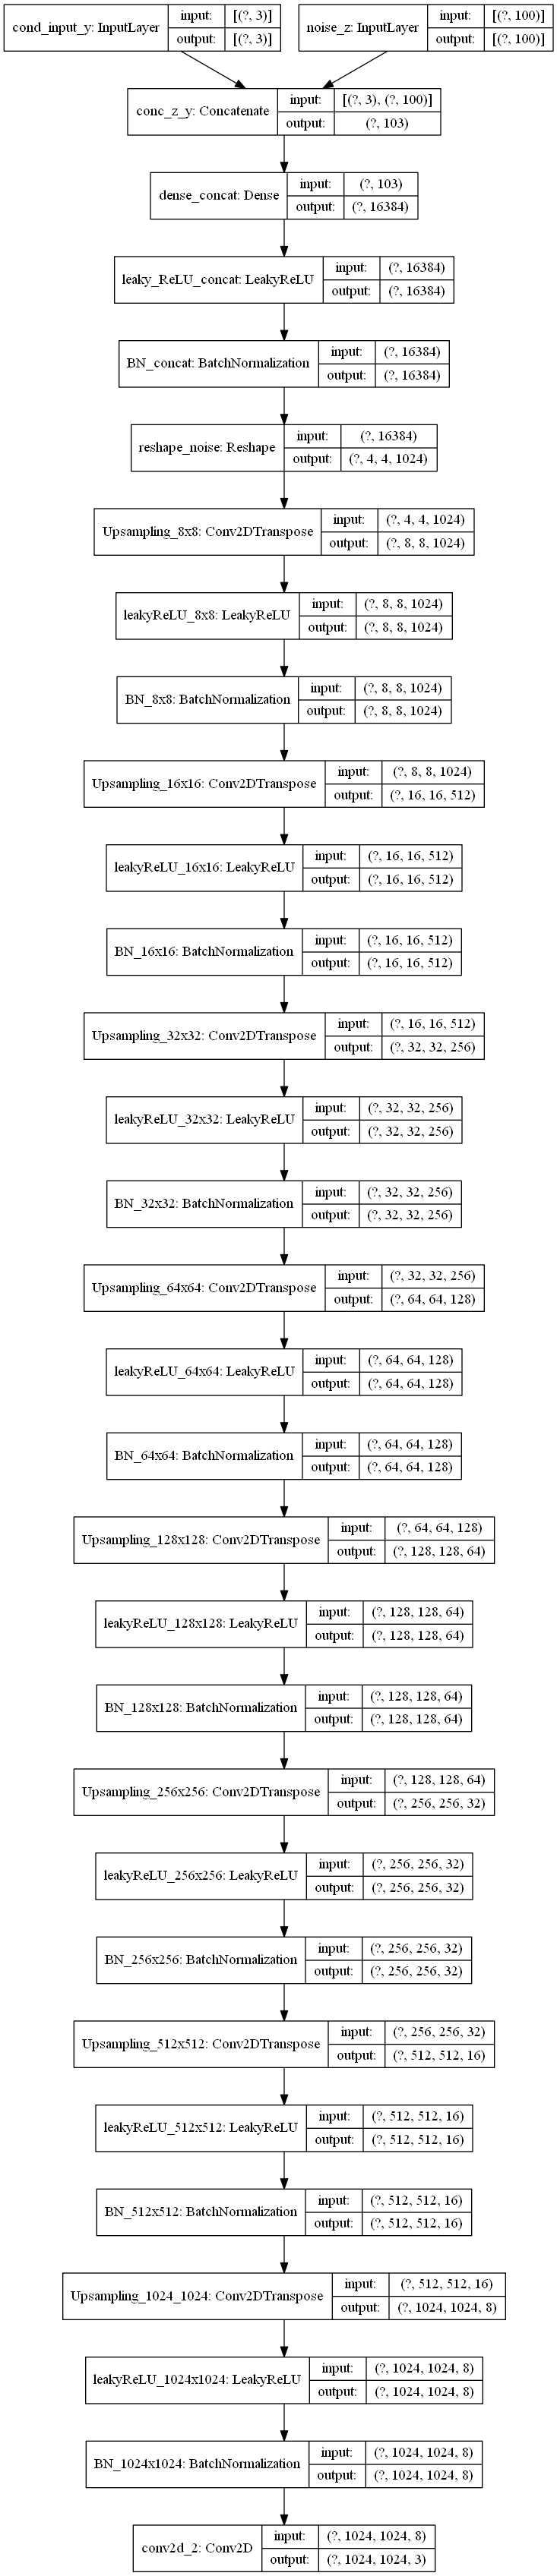

In [42]:
tf.keras.utils.plot_model(generator_model, show_layer_names=True, show_shapes=True)

In [43]:
class_1 = tf.random.uniform(
    shape=[1], minval=0, maxval=2, dtype=tf.dtypes.int32, seed=None, name=None
)
print(class_1)

tf.Tensor([1], shape=(1,), dtype=int32)


In [53]:
noise = tf.random.normal([1,100])

label_in = tf.one_hot(indices=[0], depth=3)
print(label_in)

tf.Tensor([[1. 0. 0.]], shape=(1, 3), dtype=float32)


In [54]:
generated_image = generator_model(inputs=[label_in, noise])

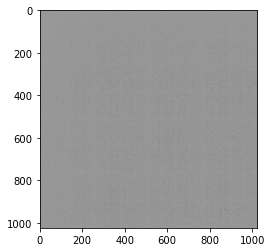

In [55]:
plt.imshow(generated_image[0,:,:,0], cmap='gray')

In [84]:
def cond_discriminator():
    # 1. Discriminator input: y-label
    conditional_input = tf.keras.layers.Input(shape=(3,), name='disc_cond_input_y')
    # Transform embedded input via dense layer
    label_input = tf.keras.layers.Dense(units=512*512*1, name='dense_cond_input')(label_input)
    # Reshape embedded input
    label_input = tf.keras.layers.Reshape((512, 512, 1), input_shape=(512*512*1,), name='reshape_cond_input')(label_input)
    
    # 2. Discriminator Input: real images (x) and fake images (x')
    image_input = tf.keras.layers.Input(shape=(1024,1024,3), name='image_input')
    
    # Begin feature extraction process
    # Downsampling: 16 feature maps
    intermediate_output = tf.keras.layers.Conv2D(16, (3,3), strides=(2,2), padding='same', name='conv_512x512')(image_input)
    intermediate_output = tf.keras.layers.LeakyReLU(alpha=0.2, name='lReLU_512x512')(intermediate_output)
    intermediate_output = tf.keras.layers.Dropout(0.33, name='Dropout_512x512')(intermediate_output)
      
    # Concatenate first feature extraction with y-label input
    # Idea is to reduce number of parameters and allow the discriminator extract feature information
    # without considering the introduced label information
    concatenated_output = tf.keras.layers.Concatenate(name='conc_image_y')([label_input, intermediate_output])
    
    # Downsampling: 32 feature maps
    intermediate_output = tf.keras.layers.Conv2D(32, (3,3), strides=(2,2), padding='same', name='conv_256x256')(concatenated_output)
    intermediate_output = tf.keras.layers.LeakyReLU(alpha=0.2, name='lReLU_256x256')(intermediate_output)
    intermediate_output = tf.keras.layers.Dropout(0.33, name='Dropout_256x256')(intermediate_output)
    
    # Downsampling: 64 feature maps
    intermediate_output = tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='conv_128x128')(intermediate_output)
    intermediate_output = tf.keras.layers.LeakyReLU(alpha=0.2, name='lReLU_128x128')(intermediate_output)
    intermediate_output = tf.keras.layers.Dropout(0.33, name='Dropout_128x128')(intermediate_output)

    # Downsampling: 128 feature maps
    intermediate_output = tf.keras.layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_64x64')(intermediate_output)
    intermediate_output = tf.keras.layers.LeakyReLU(alpha=0.2, name='lReLU_64x64')(intermediate_output)
    intermediate_output = tf.keras.layers.Dropout(0.33, name='Dropout_64x64')(intermediate_output)
    
    # Downsampling: 256 feature maps
    intermediate_output = tf.keras.layers.Conv2D(256, (3,3), strides=(2,2), padding='same', name='conv_32x32')(intermediate_output)
    intermediate_output = tf.keras.layers.LeakyReLU(alpha=0.2, name='lReLU_32x32')(intermediate_output)
    intermediate_output = tf.keras.layers.Dropout(0.33, name='Dropout_32x32')(intermediate_output)

    # Downsampling: 512 feature maps
    intermediate_output = tf.keras.layers.Conv2D(512, (3,3), strides=(2,2), padding='same', name='conv_16x16')(intermediate_output)
    intermediate_output = tf.keras.layers.LeakyReLU(alpha=0.2, name='lReLU_16x16')(intermediate_output)
    intermediate_output = tf.keras.layers.Dropout(0.33, name='Dropout_16x16')(intermediate_output)
    
    # Downsampling: 512 feature maps
    intermediate_output = tf.keras.layers.Conv2D(512, (3,3), strides=(2,2), padding='same', name='conv_8x8')(intermediate_output)
    intermediate_output = tf.keras.layers.LeakyReLU(alpha=0.2, name='lReLU_8x8')(intermediate_output)
    intermediate_output = tf.keras.layers.Dropout(0.33, name='Dropout_8x8')(intermediate_output)

    # Downsampling: 512 feature maps
    intermediate_output = tf.keras.layers.Conv2D(512, (3,3), strides=(2,2), padding='same', name='conv_4x4')(intermediate_output)
    intermediate_output = tf.keras.layers.LeakyReLU(alpha=0.2, name='lReLU_4x4')(intermediate_output)
    intermediate_output = tf.keras.layers.Dropout(0.33, name='Dropout_4x4')(intermediate_output)
    
    # Downsampling: 512 feature maps
    intermediate_output = tf.keras.layers.Conv2D(512, (4,4), strides=(1,1), padding='valid', name='conv_1x1')(intermediate_output)
    intermediate_output = tf.keras.layers.LeakyReLU(alpha=0.2, name='lReLU_1x1')(intermediate_output)
    intermediate_output = tf.keras.layers.Dropout(0.33, name='Dropout_1x1')(intermediate_output)
    
    intermediate_output = tf.keras.layers.Flatten()(intermediate_output)
    final_output = tf.keras.layers.Dense(units=1, activation='sigmoid', name='final_output')(intermediate_output)
    
    model = tf.keras.models.Model(inputs=[conditional_input, image_input], outputs=final_output, name="Discriminator")
    return model

In [86]:
discriminator_model = cond_discriminator()
# Test if discriminator provides some output
decision = discriminator_model(inputs=[label_in, generated_image])
print(decision)

tf.Tensor([[0.5000009]], shape=(1, 1), dtype=float32)


In [80]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [66]:
def generator_loss():
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
def discriminator_loss(real_output, fake_output):
    return 1

In [ ]:
Epochs = 5
noise_dim = 100
num_examples_to_generate = 15

buffer_size = 322
batch_size_real_images = 15

In [ ]:
@tf.function
def train_step(real_images, y_label):
    # generate noise for a certain number of fake images
    noise = tf.random.normal([batch_size_real_images, noise_dim])
    
    # get y_labels
    
    # record differentiable operations
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_image = generator_model(inputs=[label_in, noise])
        
        # generate output based
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(fake_output)

In [78]:
loss_d_real = tf.keras.losses.BinaryCrossentropy(tf.ones_like(d_real), d_real)
loss_d_fake = tf.keras.losses.BinaryCrossentropy(tf.zeros_like(d_fake), d_fake)

tf.Tensor(1.0, shape=(), dtype=float32)


In [63]:
# Optimizer
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)